In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_labels = pd.read_csv("train.csv")

In [3]:
train_labels = train_labels.astype('str')

In [4]:
train_labels['Target'] = train_labels['Target'].apply(lambda x: x.split(' '))
train_labels['Target'] = train_labels['Target'].apply(lambda x: list(map(lambda x: int(x), x)))

In [5]:
train_labels['Cat'] = None
for index in range(len(train_labels['Target'])):
    train_labels['Cat'][index] = [0]*28
    for index_val in train_labels['Target'][index]:
        train_labels['Cat'][index][index_val] = 1 

In [6]:
hist_data = {x: x*0 for x in range(28)}
for cat_index in range(28):    
    for index in range(len(train_labels['Target'])):
        hist_data[cat_index] += train_labels['Cat'][index][cat_index]

In [7]:
def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
        score = math.log(mu * float(total) / float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

def create_class_weight_heu(labels_dict):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()

    for key in keys:
        score =  float(total) / (len(labels_dict) * float(labels_dict[key]))
        class_weight[key] = score if score > 1.0 else 1.0

    return class_weight

In [10]:
class_weight = create_class_weight(hist_data,mu=0.15)
class_weight2 = create_class_weight_heu(hist_data)

In [11]:
from sklearn.manifold import TSNE

In [18]:
X = train_labels['Cat'].values
X = np.array(list(map(lambda x: np.array(x), X)))

In [27]:
X_embedded = TSNE(n_components=2).fit_transform(X[:10000])

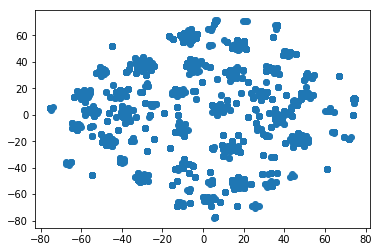

In [28]:
plt.scatter(X_embedded.T[0],X_embedded.T[1])

In [32]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [44]:
X_embedded_scaled = StandardScaler().fit_transform(X_embedded)

# Compute DBSCAN
db = DBSCAN(eps=0.1, min_samples=50).fit(X_embedded_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 38
Estimated number of noise points: 1744


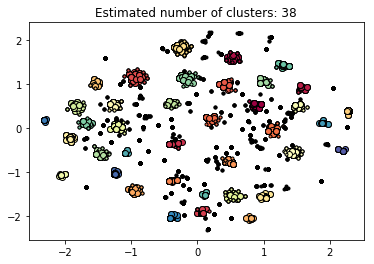

In [45]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_embedded_scaled[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

    xy = X_embedded_scaled[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [2]:
red_img_path,  green_img_path, blue_img_path, yellow_img_path = \
        ('skjdhfk-' + 'img_id' + '_{}.png'.format('red', 'green', 'blue', 'yellow'))

ValueError: too many values to unpack (expected 4)

In [10]:
train_labels.values[0][2]

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]